In [3]:
import os
os.chdir("/Users/talia/Desktop/defi_market_data_pipeline")
os.getcwd()

import pandas as pd
import matplotlib.pyplot as plt

# optional: make charts look nicer
plt.style.use("seaborn-v0_8")

df = pd.read_parquet("data/processed/merged_tvl_prices.parquet")

df.head()


,date,protocol,tvl_usd,coin_id,price
0,2022-03-14,Aave V3,6,None,NaN
1,2022-03-15,Aave V3,7,None,NaN
2,2022-03-16,Aave V3,11,None,NaN
3,2022-03-17,Aave V3,7676242,None,NaN
4,2022-03-18,Aave V3,14138880,None,NaN


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      5137 non-null   datetime64[ns]
 1   protocol  5137 non-null   object        
 2   tvl_usd   5137 non-null   int64         
 3   coin_id   0 non-null      object        
 4   price     0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 200.8+ KB


In [5]:
df.isna().sum()


date           0
protocol       0
tvl_usd        0
coin_id     5137
price       5137
dtype: int64

In [8]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df.head()


,date,protocol,tvl_usd,coin_id,price
3019,2020-02-09,Curve DEX,1163733,None,NaN
3020,2020-02-10,Curve DEX,1372109,None,NaN
3021,2020-02-11,Curve DEX,8936,None,NaN
3022,2020-02-12,Curve DEX,38139,None,NaN
3023,2020-02-13,Curve DEX,273331,None,NaN


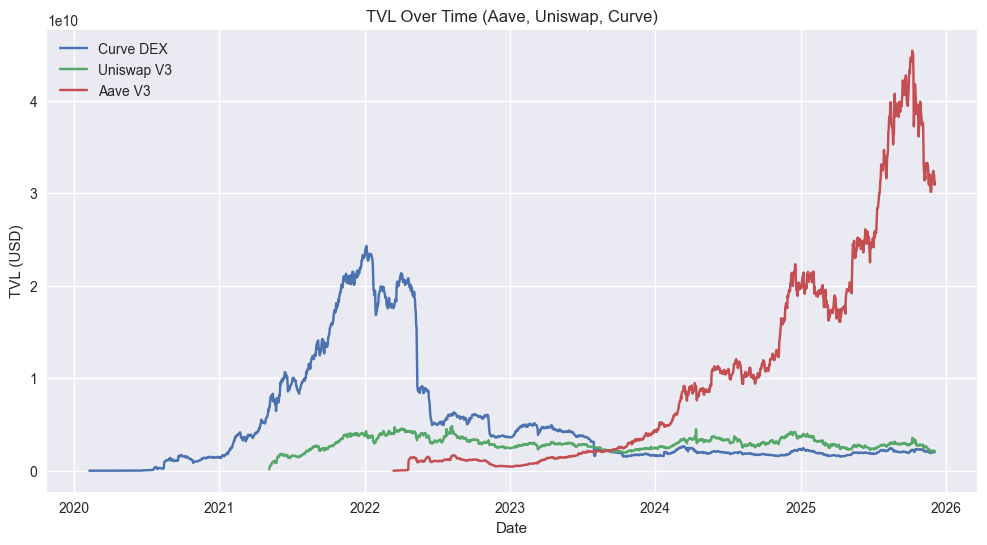

In [11]:
protocols = df['protocol'].unique()

plt.figure(figsize=(12,6))
for p in protocols:
    sub = df[df['protocol'] == p]
    plt.plot(sub['date'], sub['tvl_usd'], label=p)

plt.title("TVL Over Time (Aave, Uniswap, Curve)")
plt.xlabel("Date")
plt.ylabel("TVL (USD)")
plt.legend()
plt.show()


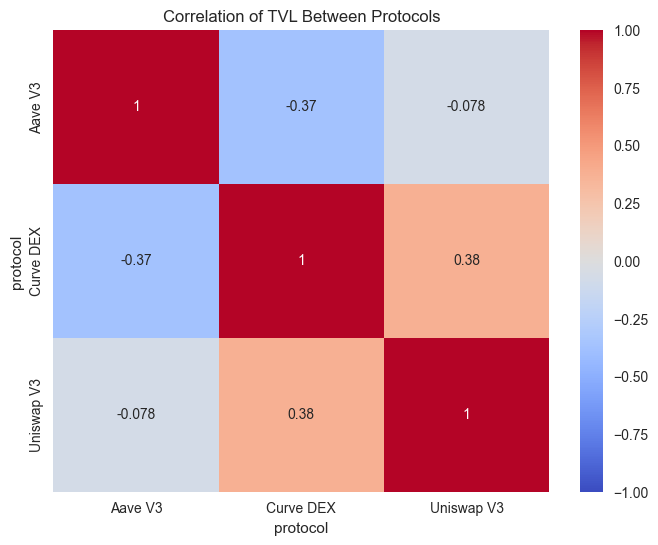

In [22]:
pivot = df.pivot_table(
    index="date",
    columns="protocol",
    values="tvl_usd",
    aggfunc="mean"
)

corr = pivot.corr()
corr
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation of TVL Between Protocols")
plt.show()

Correlation Heatmap

The heatmap shows how TVL movements across Aave V3, Curve DEX, and Uniswap V3 relate to each other.

Aave vs Curve: -0.37 → moderate negative correlation; lending liquidity and stablecoin liquidity often move in opposite directions.

Aave vs Uniswap: -0.078 → almost no relationship; the two protocols behave independently.

Curve vs Uniswap: +0.38 → mild positive correlation; both are DEX-based and share some liquidity flow patterns.

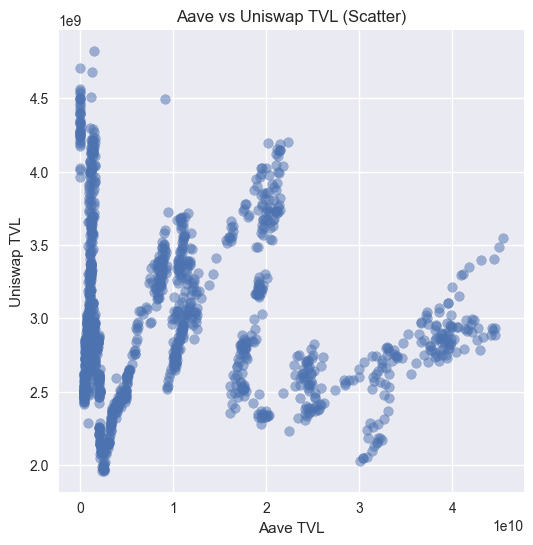

In [25]:
aave = pivot["Aave V3"]
uni = pivot["Uniswap V3"]

plt.figure(figsize=(6,6))
plt.scatter(aave, uni, alpha=0.5)
plt.xlabel("Aave TVL")
plt.ylabel("Uniswap TVL")
plt.title("Aave vs Uniswap TVL (Scatter)")
plt.show()


Aave vs Uniswap TVL (Scatter Plot)

Each point represents Aave TVL vs Uniswap TVL on the same day.

The wide scatter pattern shows no clear linear relationship.

Aave (lending) and Uniswap (DEX liquidity) follow different user behaviors and market drivers, so their TVL does not move together.

Final Conclusion

Overall, the analysis shows that each protocol follows its own liquidity dynamics. Aave’s TVL reflects lending activity, while Curve and Uniswap respond more to trading and liquidity-pool behavior. The differences in correlation and movement patterns highlight how liquidity flows vary across lending, stablecoin, and DEX ecosystems. This confirms that TVL in DeFi is highly protocol-specific and influenced by distinct market drivers.